# EDA
본격적인 학습에 앞서서 데이터 특성을 파악하고 전처리를 진행하여 학습이 보다 용이하게 될 수 있도록 하기 위한 EDA를 진행합니다. 체크할 사항은 다음과 같습니다.
>- 전체적인 데이터 타입에 대한 파악 (object, float)
>- 데이터 분포 파악
>- 이상치, 결측치 파악 

In [5]:
!pip install seaborn

  Using cached seaborn-0.13.2-py3-none-any.whl.metadata (5.4 kB)
Using cached seaborn-0.13.2-py3-none-any.whl (294 kB)


In [6]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

import os

In [9]:
train_df = pd.read_csv(r'D:\LGAimers\Hackerton\data\train.csv')
test_df = pd.read_csv(r'D:\LGAimers\Hackerton\data\test.csv')

In [11]:
# 특정 값 (OK) null 로 대체
train_df = train_df.replace('OK', np.nan)

C:\Users\InheonChoi\AppData\Local\Temp\ipykernel_26116\3299245821.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  train_df = train_df.replace('OK', np.nan)


In [12]:
# Dataset에서 결측치 확인하기
missing_values = train_df.isnull().sum()

missing_values

Wip Line_Dam                         0
Process Desc._Dam                    0
Equipment_Dam                        0
Model.Suffix_Dam                     0
Workorder_Dam                        0
                                 ...  
Receip No Judge Value_Fill2      40506
WorkMode Collect Result_Fill2        0
WorkMode Unit Time_Fill2         40506
WorkMode Judge Value_Fill2       40506
target                               0
Length: 464, dtype: int64

In [13]:
# 결측치 비율 계산
total_entries = len(train_df)
missing_percentage = (train_df.isnull().sum() / total_entries) *100

# 결측치 비율 확인
missing_percentage.sort_values(ascending=False)

WorkMode Judge Value_Fill2             100.0
WorkMode Unit Time_Fill2               100.0
Receip No Judge Value_Fill2            100.0
Receip No Unit Time_Fill2              100.0
Production Qty Judge Value_Fill2       100.0
                                       ...  
PalletID Collect Result_Fill2            0.0
Production Qty Collect Result_Fill2      0.0
Receip No Collect Result_Fill2           0.0
WorkMode Collect Result_Fill2            0.0
target                                   0.0
Length: 464, dtype: float64

In [14]:
# 결측치 비율이 일정 수준 이상인 속성들을 삭제
# 50%를 기준으로 설정
threshold = 50.0
columns_to_drop = missing_percentage[missing_percentage > threshold].index

# 해당 속성들을 데이터셋에서 삭제
cleaned_data = train_df.drop(columns = columns_to_drop)

# 새로운 데이터셋의 크기 확인
cleaned_data.shape

(40506, 170)

In [15]:
# 기술 통계량 추출
descriptive_stats = cleaned_data.describe(include = 'all').transpose()

# 결측치 수 추가
descriptive_stats['missing_values'] = cleaned_data.isnull().sum()

# 상위 5개의 기술 통계량을 확인
descriptive_stats

,count,unique,top,freq,mean,std,min,25%,50%,75%,max,missing_values
Wip Line_Dam,40506,1,IVI-OB6,40506,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
Process Desc._Dam,40506,1,Dam Dispenser,40506,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
Equipment_Dam,40506,2,Dam dispenser #1,25030,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
Model.Suffix_Dam,40506,7,AJX75334501,33820,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
Workorder_Dam,40506,663,3L1X8574-2,272,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...,...
PalletID Collect Result_Fill2,40506.0,NaN,NaN,NaN,14.385928,7.261448,1.0,7.0,19.5,19.9,52.9,0
Production Qty Collect Result_Fill2,40506.0,NaN,NaN,NaN,73.539648,105.176311,0.0,7.0,13.0,120.0,487.0,0
Receip No Collect Result_Fill2,40506.0,NaN,NaN,NaN,108.691453,130.758018,0.0,1.0,49.0,196.0,608.0,0
WorkMode Collect Result_Fill2,40506.0,NaN,NaN,NaN,0.771392,1.289203,0.0,0.0,1.0,1.0,17.0,0


In [16]:
# 수치형 변수 분석
numeric_columns = cleaned_data.select_dtypes(include = [np.number]).columns

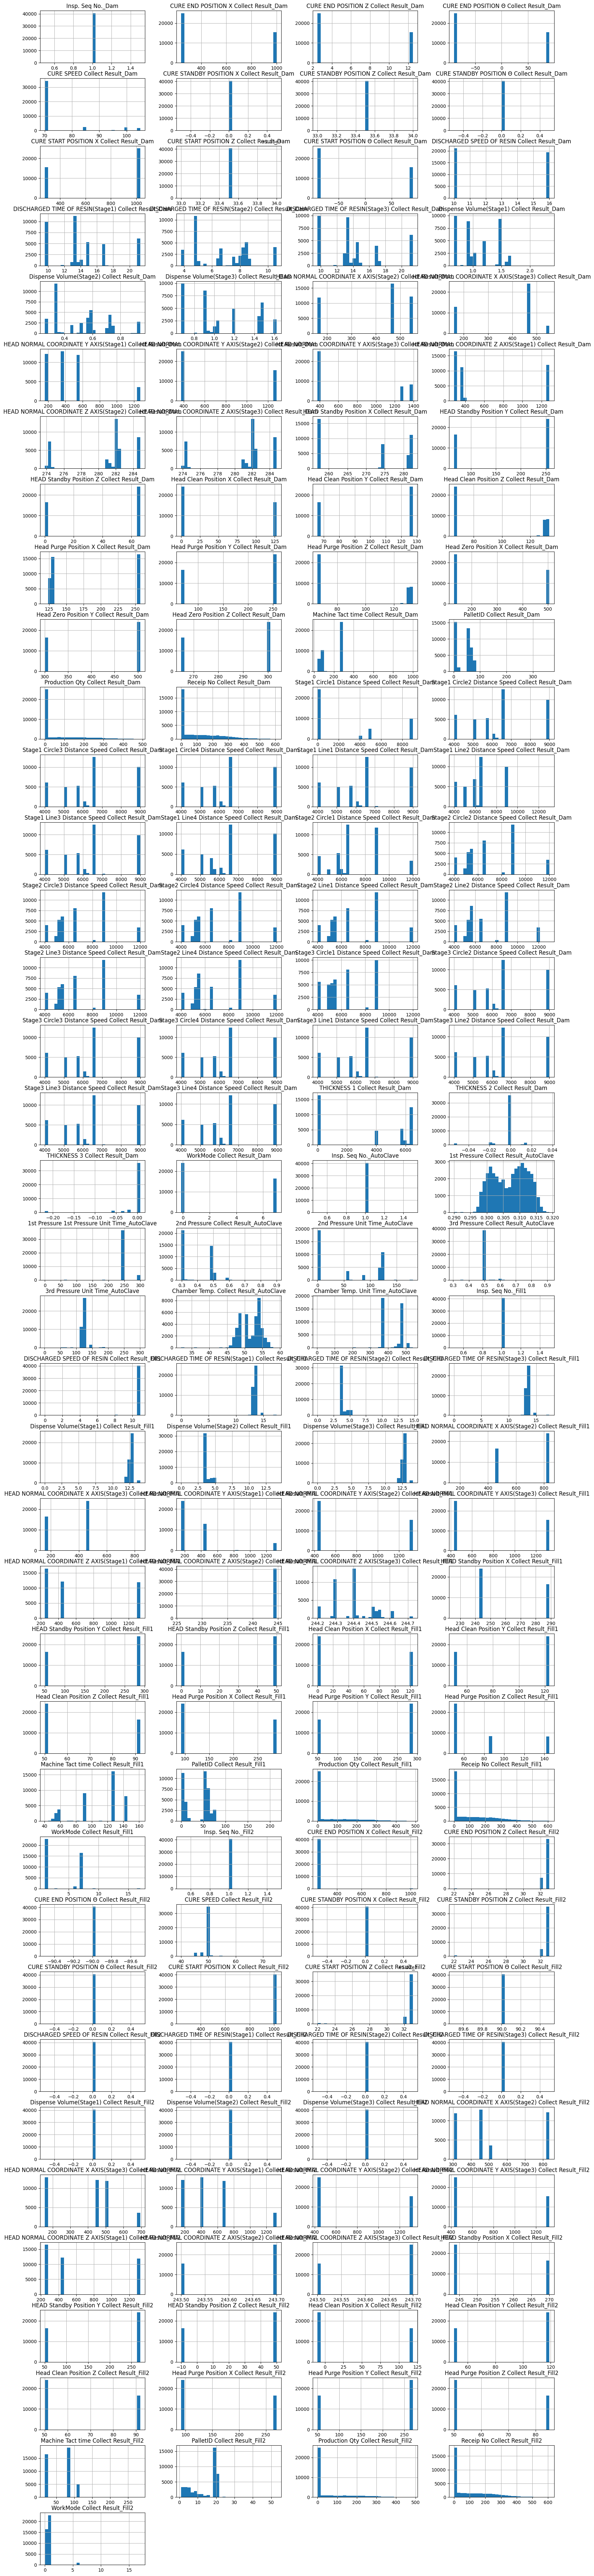

In [20]:
# 데이터 히스토그램
plt.rcParams['figure.figsize'] = [20, 100]
cleaned_data[numeric_columns].hist(bins = 30, layout=(int(len(numeric_columns)/4)+1, 4))
plt.show()

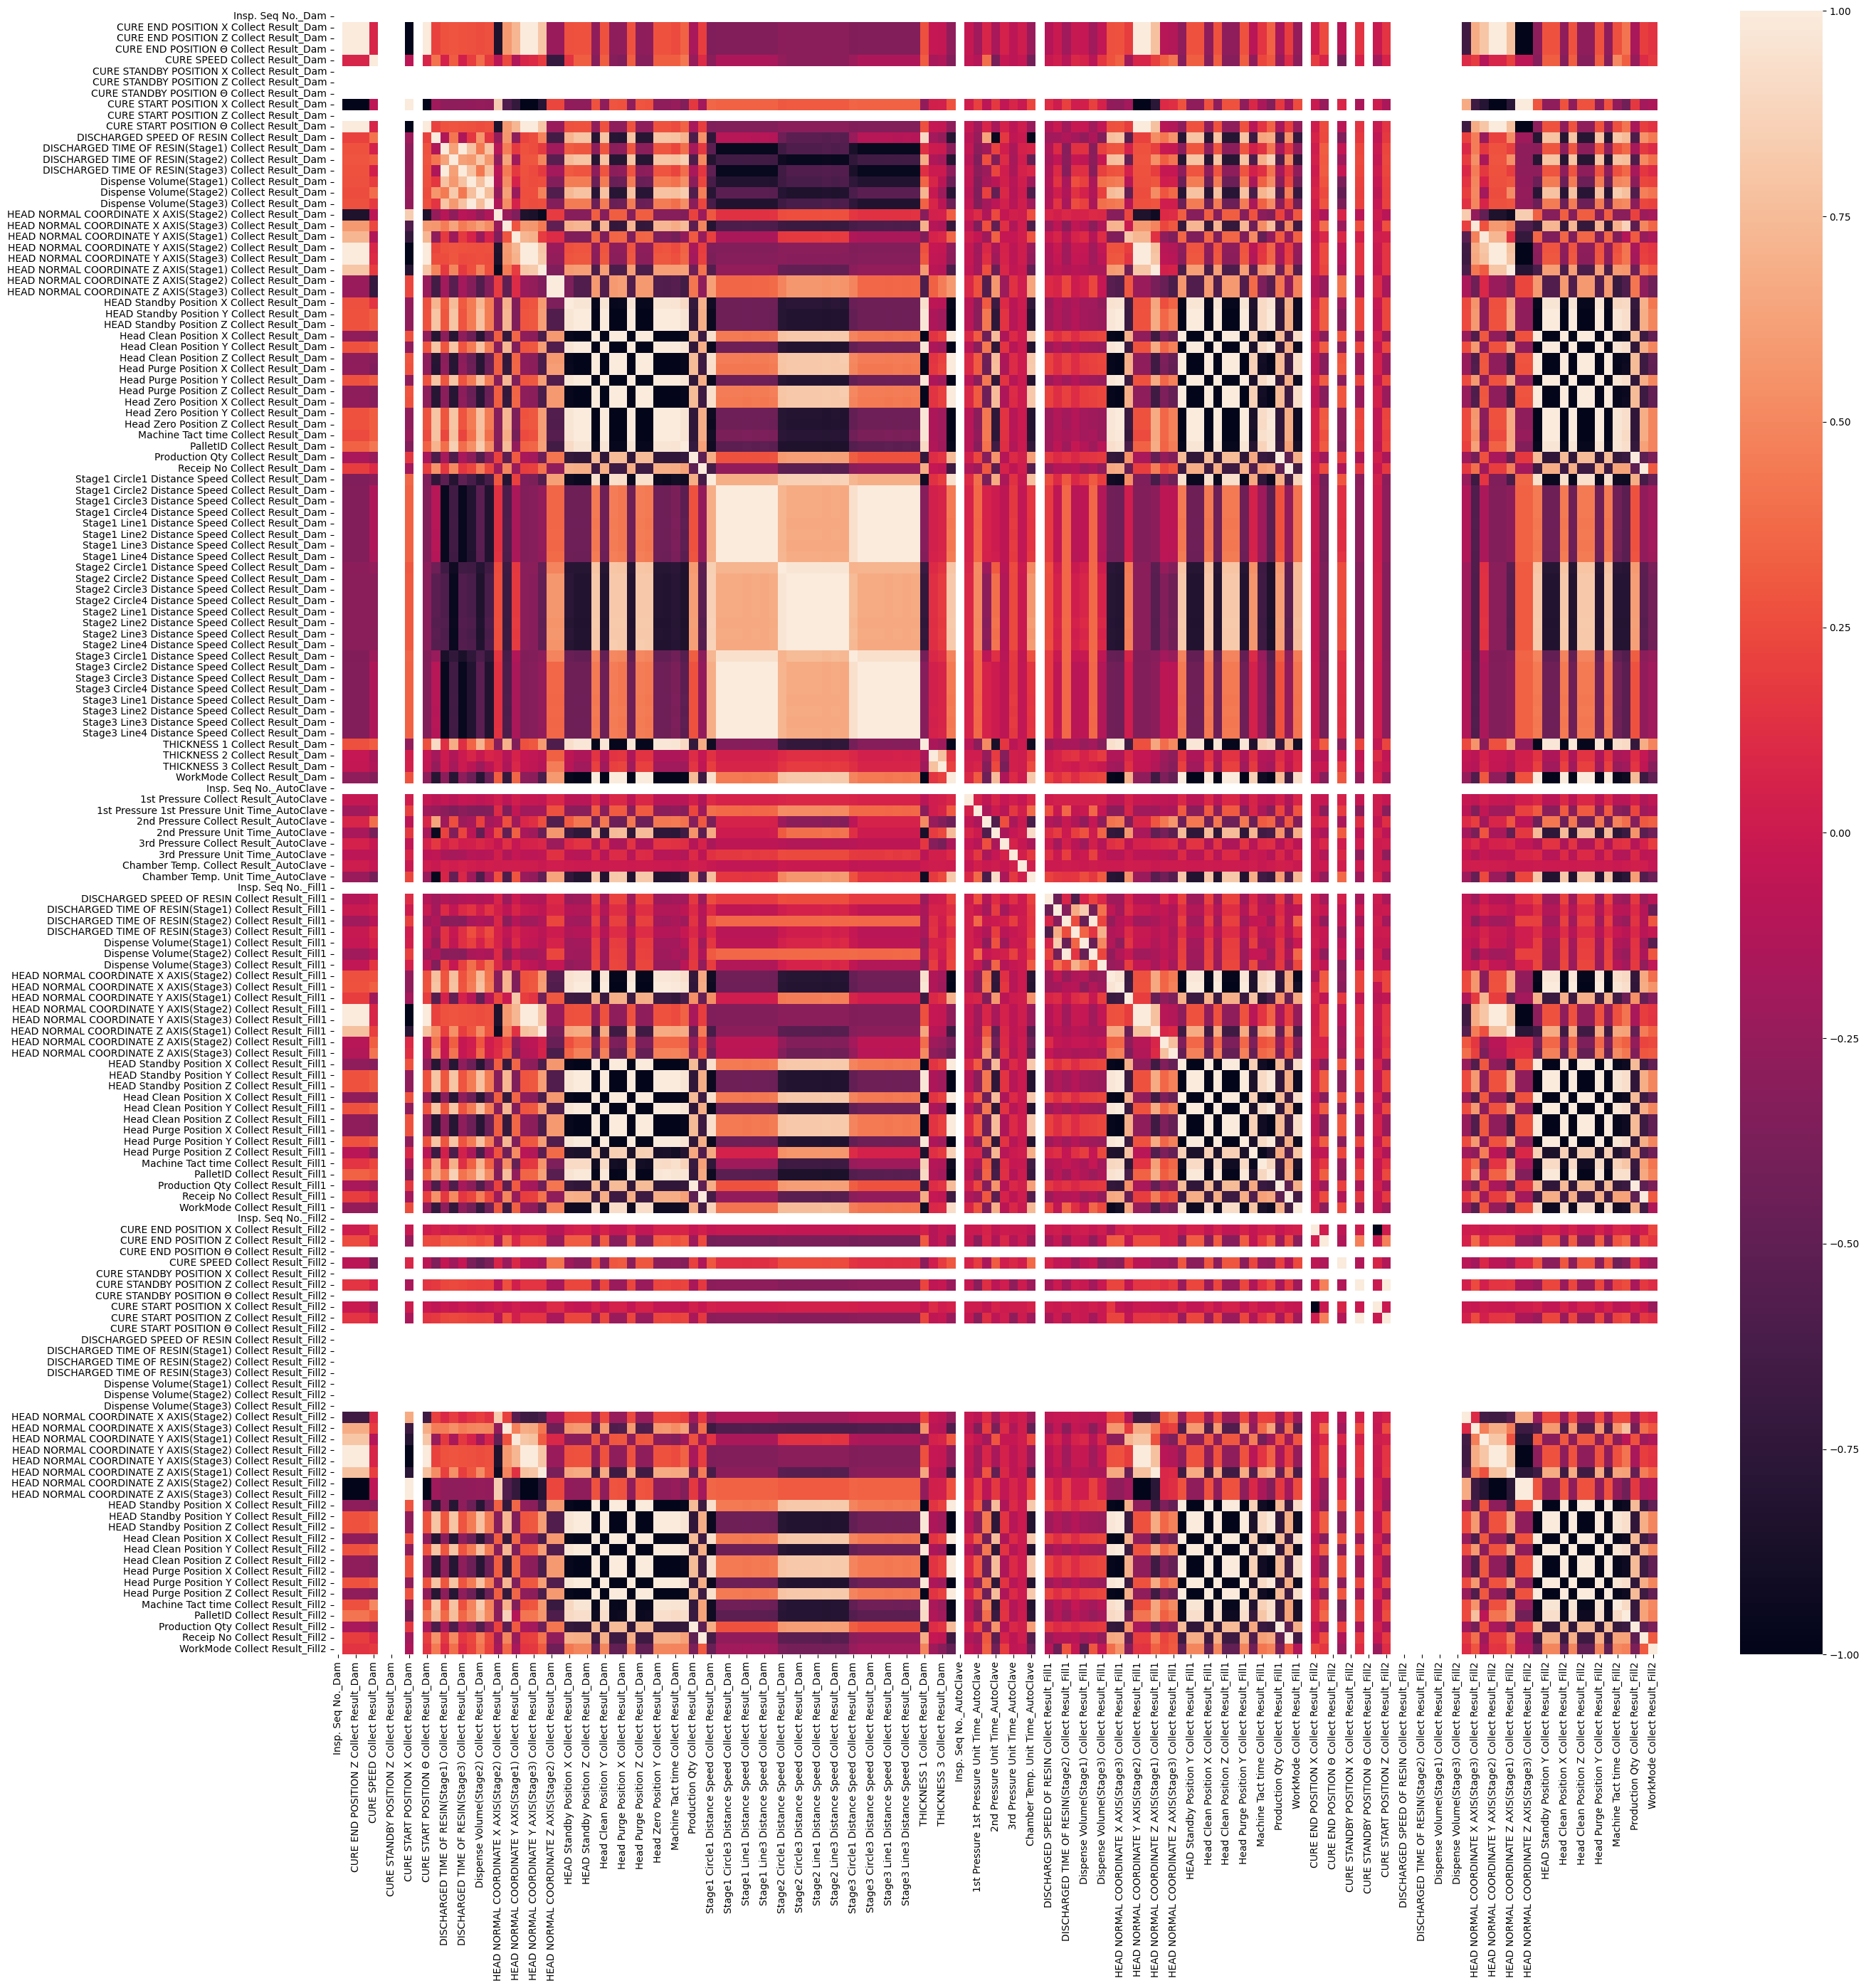

In [18]:
# heatmap
plt.rcParams['figure.figsize'] = [30, 30]
corr_matrix = cleaned_data[numeric_columns].corr()
sns.heatmap(corr_matrix, annot = False)
plt.show()

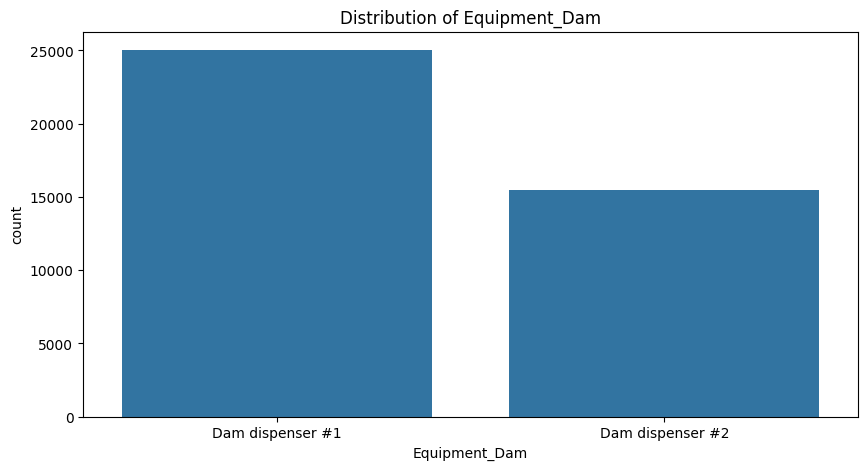

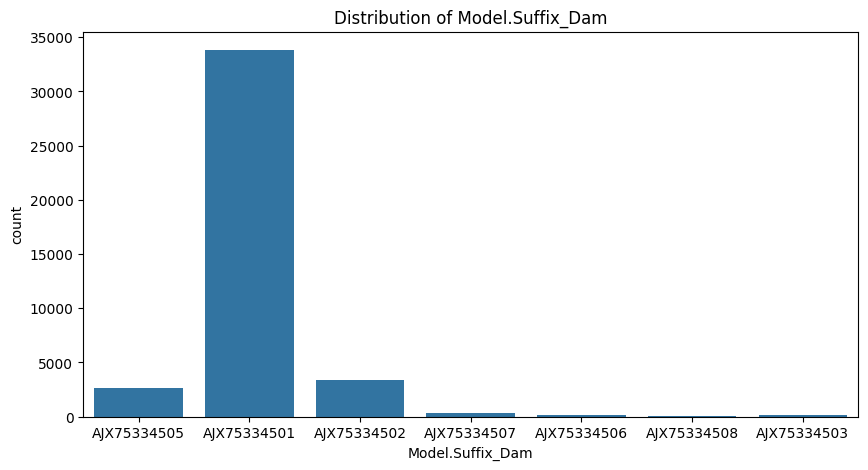

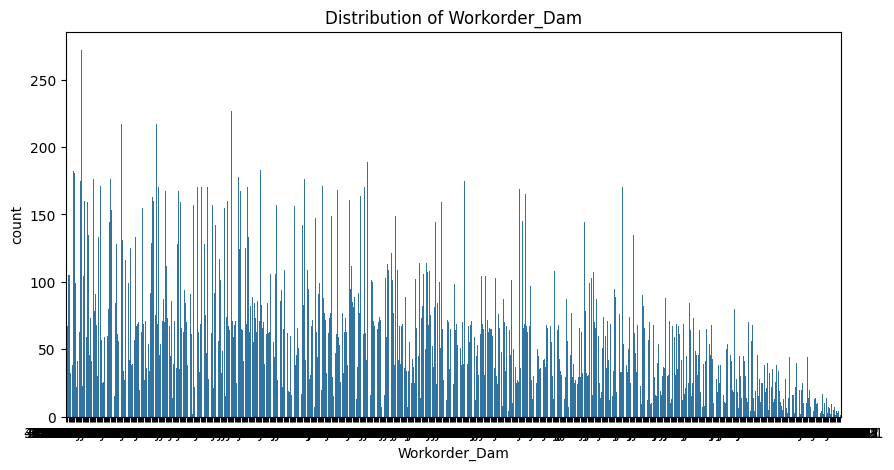

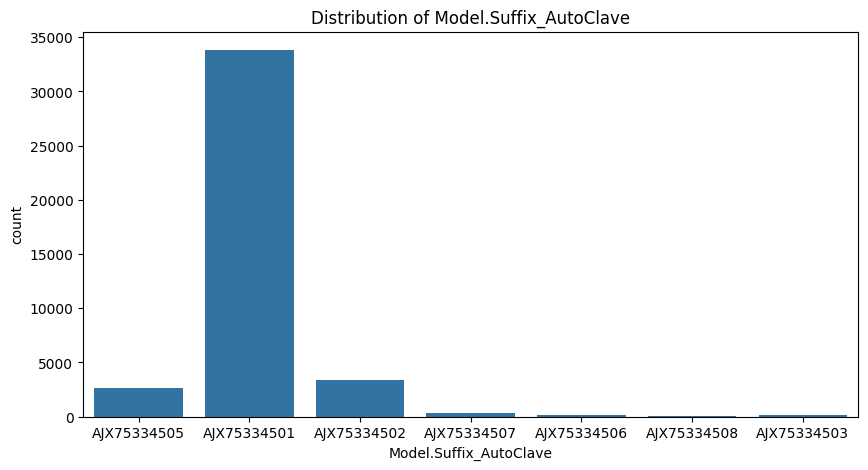

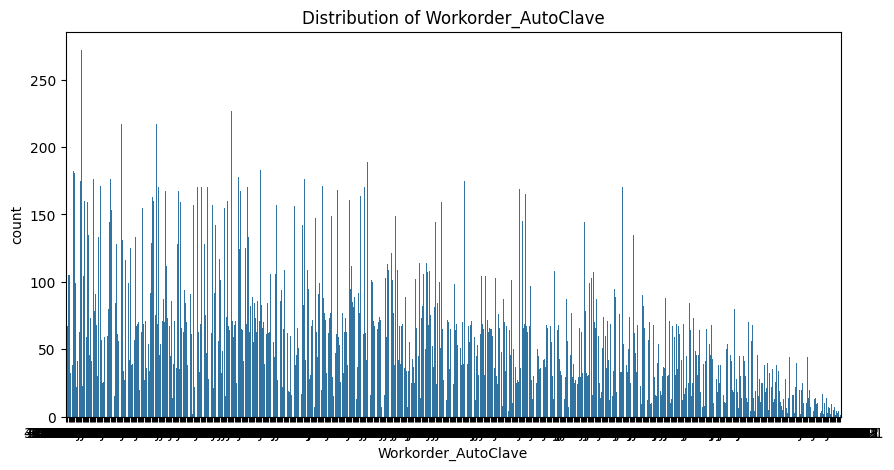

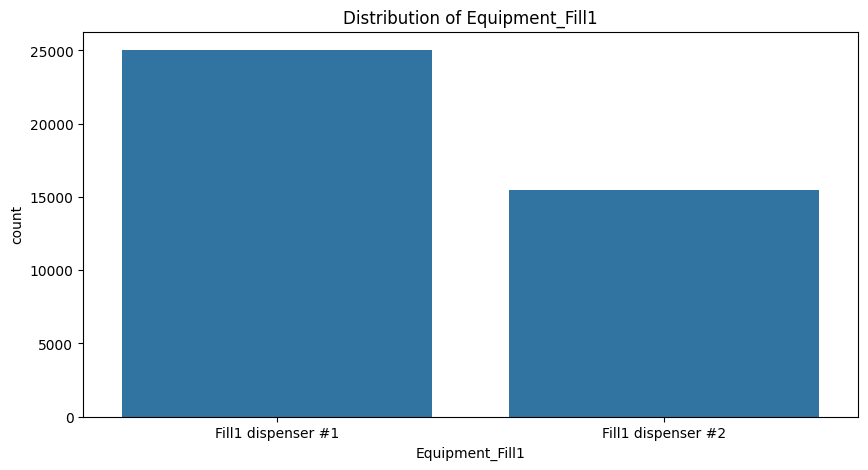

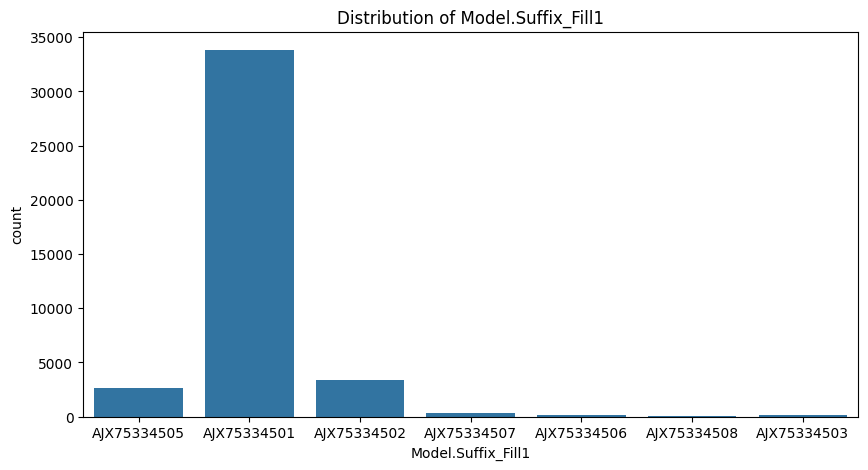

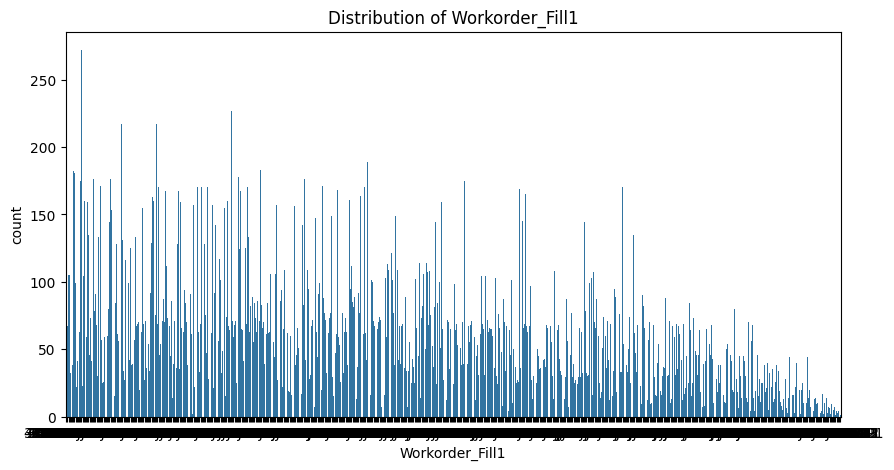

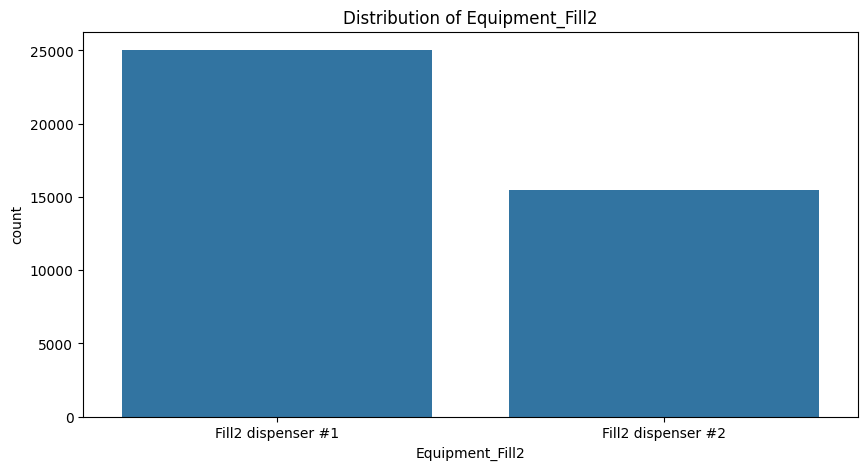

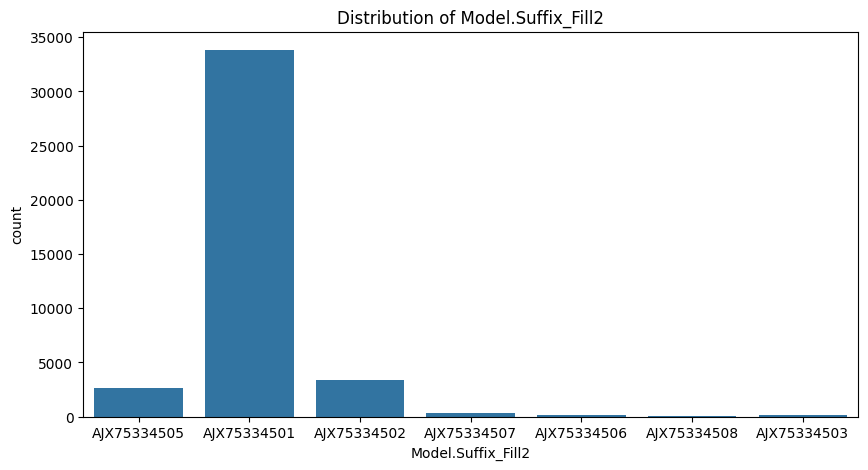

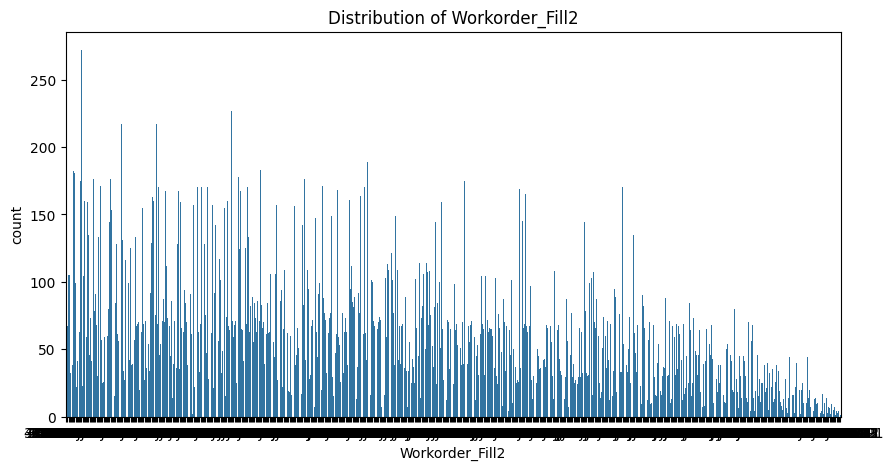

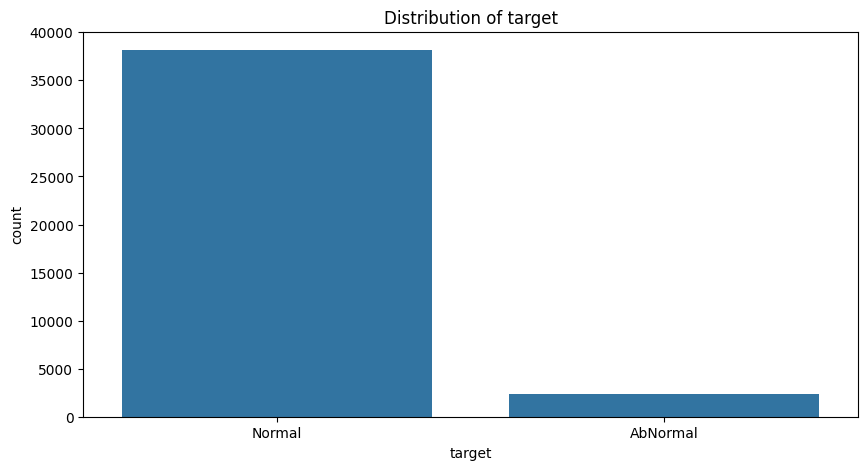

In [19]:
# 범주형 변수 분석
# 단일 속성을 가지는 column 삭제
categorical_data = cleaned_data.select_dtypes(include = ['object'])
single_value_columns = [col for col in categorical_data.columns if categorical_data[col].nunique() == 1]
cleaned_data = cleaned_data.drop(columns = single_value_columns)
categorical_columns = cleaned_data.select_dtypes(include = [object, 'category']).columns

for col in categorical_columns:
    plt.figure(figsize = (10, 5))
    sns.countplot(x = col, data = cleaned_data)
    plt.title(f'Distribution of {col}')
    plt.show()

In [ ]:
# 이상치 분석
for col in numeric_columns:
    plt.figure(figsize = (10, 5))
    sns.boxplot(x = cleaned_data[col])
    plt.title(f'Boxplot of {col}')
    plt.show()